In [96]:
import numpy  as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
import matplotlib.pyplot as plt

In [97]:
yfin.pdr_override()

df = pdr.get_data_yahoo('AAPL', start='2010-01-01', end='2022-12-31')

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507525,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404014,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434672,447610800


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3272 entries, 2010-01-04 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3272 non-null   float64
 1   High       3272 non-null   float64
 2   Low        3272 non-null   float64
 3   Close      3272 non-null   float64
 4   Adj Close  3272 non-null   float64
 5   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 178.9 KB


In [99]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.477127,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.652435,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.674019,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.233658,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.552719,77034200


In [100]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507525,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404014,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434672,447610800


In [101]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


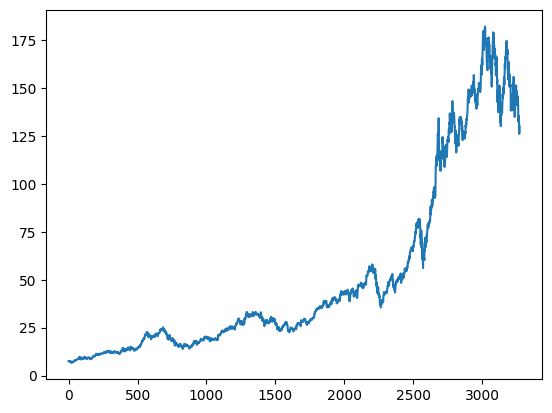

In [102]:
plt.plot(df.Close)

In [103]:
moving_avg100 = df.Close.rolling(100).mean()
moving_avg100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    150.515600
3268    150.157800
3269    149.764699
3270    149.412100
3271    149.062199
Name: Close, Length: 3272, dtype: float64

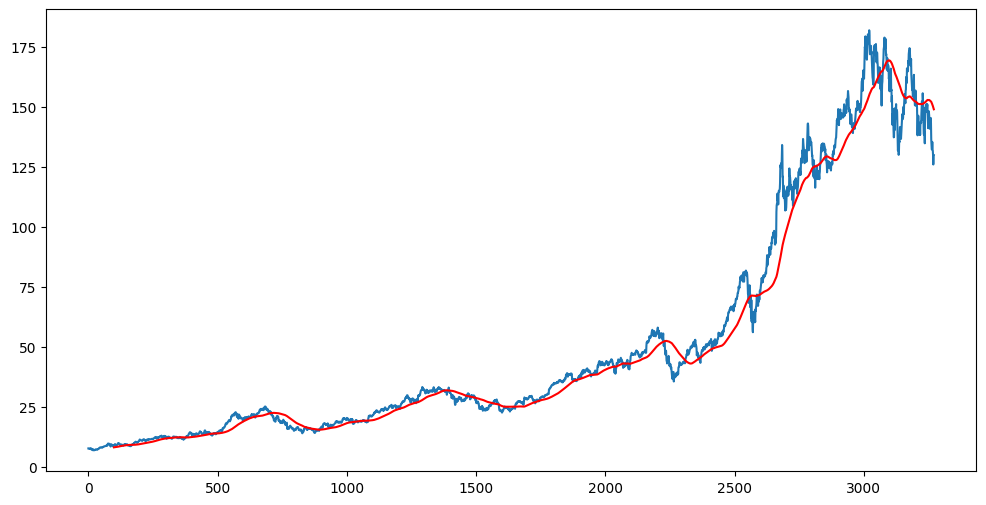

In [104]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(moving_avg100, 'r')

In [105]:
moving_avg200 = df.Close.rolling(200).mean()
moving_avg200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3267    152.1331
3268    152.0096
3269    151.8867
3270    151.7593
3271    151.6110
Name: Close, Length: 3272, dtype: float64

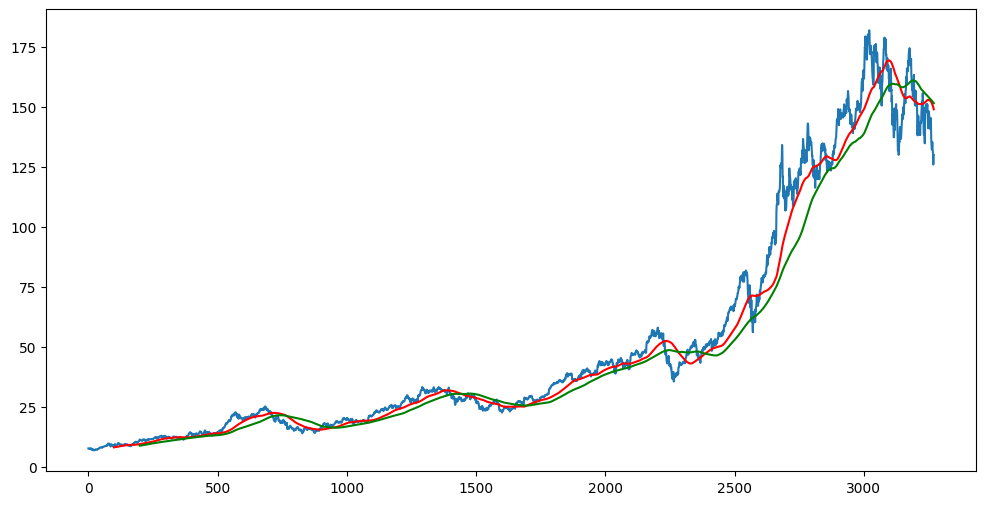

In [106]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(moving_avg100, 'r')
plt.plot(moving_avg200, 'g')

In [107]:
df.shape

(3272, 5)

In [108]:
#Splitting data into training and testing set

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2290, 1)
(982, 1)


In [109]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [110]:
data_testing.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [112]:
data_training_array = scaler.fit_transform(data_training)

data_training_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.71710501],
       [0.71739828],
       [0.70127194]])

In [113]:
data_training_array.shape

(2290, 1)

In [114]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [115]:
x_train.shape

(2190, 100, 1)

In [116]:
#ML Model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [117]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1))

In [118]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [119]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
69/69 [==============================] - 29s 329ms/step - loss: 0.0311
Epoch 2/50
69/69 [==============================] - 23s 331ms/step - loss: 0.0064
Epoch 3/50
69/69 [==============================] - 22s 324ms/step - loss: 0.0056
Epoch 4/50
69/69 [==============================] - 21s 310ms/step - loss: 0.0053
Epoch 5/50
69/69 [==============================] - 22s 324ms/step - loss: 0.0051
Epoch 6/50
69/69 [==============================] - 22s 323ms/step - loss: 0.0049
Epoch 7/50
69/69 [==============================] - 22s 316ms/step - loss: 0.0041
Epoch 8/50
69/69 [==============================] - 24s 340ms/step - loss: 0.0040
Epoch 9/50
69/69 [==============================] - 22s 323ms/step - loss: 0.0040
Epoch 10/50
69/69 [==============================] - 22s 320ms/step - loss: 0.0040
Epoch 11/50
69/69 [==============================] - 21s 305ms/step - loss: 0.0041
Epoch 12/50
69/69 [==============================] - 22s 318ms/step - loss: 0.0038
Epoch 13/50
6

In [120]:
data_training.tail(100)

,Close
2190,55.959999
2191,54.470001
2192,54.560001
2193,54.592499
2194,55.007500
...,...
2285,41.630001
2286,42.812500
2287,43.544998
2288,43.560001


In [121]:
model.save('Keras_model.h5')

In [122]:
past_100days = data_training.tail(100)

final_df = past_100days.append(data_testing, ignore_index = True)


<ipython-input-122-2920f3ed97d5>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100days.append(data_testing, ignore_index = True)


In [123]:
final_df.head()

,Close
0,55.959999
1,54.470001
2,54.560001
3,54.592499
4,55.007500


In [124]:
final_df.shape

(1082, 1)

In [125]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.13937014],
       [0.1291969 ],
       [0.1298114 ],
       ...,
       [0.61785443],
       [0.64222927],
       [0.64441407]])

In [126]:
input_data.shape

(1082, 1)

In [127]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100 : i])
  y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)  

In [128]:
#Making Predictions

y_predicted = model.predict(x_test)

31/31 [==============================] - 3s 85ms/step


In [129]:
print(y_predicted.shape)

(982, 1)


In [130]:
print(x_test.shape)
print(y_test.shape)

(982, 100, 1)
(982,)


In [131]:
y_test

array([0.04816933, 0.04649653, 0.04898865, 0.04777672, 0.04883503,
       0.04818639, 0.04905691, 0.05093454, 0.04927882, 0.05253905,
       0.05468976, 0.05486046, 0.05578219, 0.05284628, 0.05595289,
       0.05745499, 0.05690876, 0.05518478, 0.05173679, 0.05243663,
       0.06266108, 0.06609201, 0.06745755, 0.07090551, 0.07498506,
       0.07822822, 0.0756849 , 0.07846719, 0.09029614, 0.08340019,
       0.07945721, 0.07612869, 0.07899633, 0.07942306, 0.08152257,
       0.08372451, 0.08846975, 0.09073996, 0.09132031, 0.09355637,
       0.09884784, 0.09782367, 0.09973542, 0.09688486, 0.09674831,
       0.0973628 , 0.09739694, 0.10401981, 0.10526585, 0.10640949,
       0.1114449 , 0.1108987 , 0.10768968, 0.1060169 , 0.10654605,
       0.09982077, 0.11663396, 0.11429546, 0.11873346, 0.11315182,
       0.10355893, 0.1036272 , 0.09990612, 0.0938636 , 0.0743023 ,
       0.07932065, 0.08317828, 0.08174448, 0.079901  , 0.06981308,
       0.0758044 , 0.06928394, 0.06395836, 0.06278058, 0.06151

In [132]:
y_predicted

array([[0.12458116],
       [0.12568954],
       [0.12687618],
       [0.12809326],
       [0.12929924],
       [0.13046025],
       [0.13155104],
       [0.13255522],
       [0.133468  ],
       [0.13428755],
       [0.13502069],
       [0.13568312],
       [0.1362908 ],
       [0.13685863],
       [0.1373916 ],
       [0.13789627],
       [0.13838276],
       [0.13885696],
       [0.13931698],
       [0.13974957],
       [0.14014208],
       [0.14051078],
       [0.14088792],
       [0.14130315],
       [0.14178473],
       [0.14236134],
       [0.14305806],
       [0.1438769 ],
       [0.14481074],
       [0.14587882],
       [0.14707254],
       [0.14835295],
       [0.14966679],
       [0.15096904],
       [0.15222424],
       [0.15341055],
       [0.15452054],
       [0.15556554],
       [0.15656623],
       [0.15754172],
       [0.15851142],
       [0.15950449],
       [0.16053732],
       [0.16161916],
       [0.16273955],
       [0.16387853],
       [0.16501474],
       [0.166

In [133]:
scaler.scale_

array([0.00682769])

In [134]:
scale_factor = 1/0.00682769

y_test = y_test * scale_factor
y_predicted = y_predicted * scale_factor

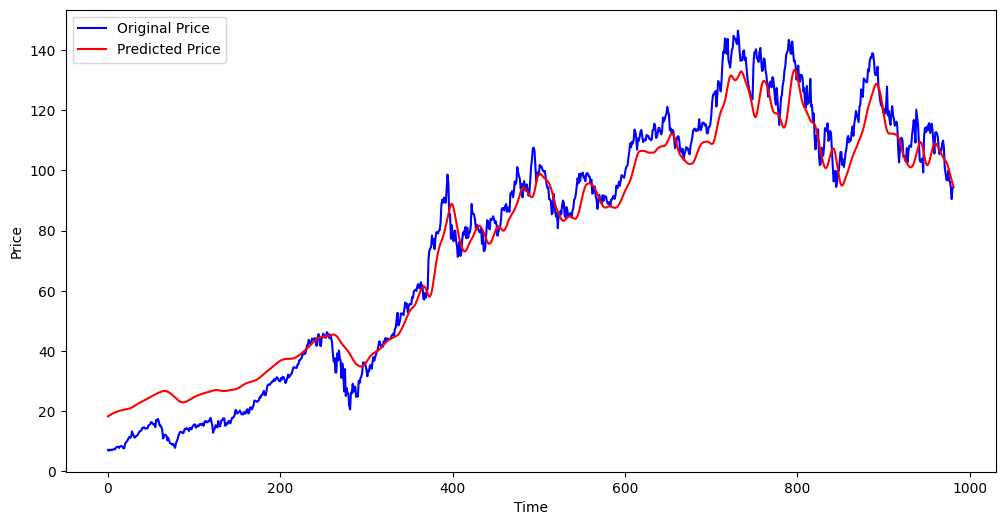

In [135]:
plt.figure(figsize = (12, 6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()